### Cross Power Analysis
This demo shows how to do phase locking and power spectrum analysis for 2 brain area's data. This will show phase locking in different power band for different 

#### **Methods below includes**:
Read demo P4A1 is highly recommended before it, as several function here is used before.    
Contains method below:

1. 2-area(can combine area as required) specturm analysis(wavelet and slide window fourier)
    
2. 2-area wavelet coherence analysis

3. Phase Locking Analysis(Hilbert transform)

4. Phase Locking Index (PLI), for different power band, different location.


___
- Load in part

In [2]:
# import and basic path part
import Common_Functions as cf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from tqdm import tqdm
import pandas as pd
# from Atlas_Corr_Tools import Atlas_Data_Tools,Contra_Similar
from Brain_Atlas.Atlas_Mask import Mask_Generator
import copy

wp=r'D:\ZR\_Data_Temp\Ois200_Data\Full_Demo\Wild_Type\Preprocessed'
series = np.load(cf.join(wp,'z_series.npy'))

# join chamber mask with brain area mask, getting only mask with values.
mask = cv2.imread(cf.join(wp,'Chamber_mask.png'),0)>0
joint_mask = (series.std(0)>0)*mask*mask[:,::-1]

series = np.clip(series,-3,3)*joint_mask



MemoryError: Unable to allocate 12.6 GiB for an array with shape (18025, 330, 285) and data type float64

Let's select 2 brain areas for phase locking test, for example, left Visual and left somatosensory.

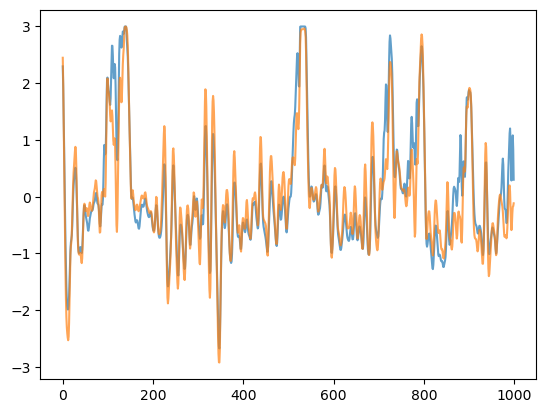

In [ ]:
MG = Mask_Generator(bin=4)
LV_mask = joint_mask*MG.Get_Func_Mask('VI','L')
LS_mask = joint_mask*MG.Get_Func_Mask('SS','L')
LV_series = series[:,LV_mask].mean(-1)
LS_series = series[:,LS_mask].mean(-1)

# plot example locs
plt.plot(LV_series[11000:12000],alpha=0.7)
plt.plot(LS_series[11000:12000],alpha=0.7)


Okay, the global signal dominates the response. Let's try something new.

___
- ##### Part 1, FFT Cross power spectrum
The most common way for spectrum analysis. Actually works pretty fine


In [ ]:
LS_series.shape

NameError: name 'LS_series' is not defined